In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import collections
from collections import Counter 
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scry import Scry

In [2]:
file_path = "/Users/kjams/Desktop/projects/hci_m_project/suvery_one.csv"
df = pd.read_csv(file_path)
df = df.drop('response', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      25 non-null     int64 
 1   Q2      25 non-null     int64 
 2   Q3      25 non-null     object
 3   Q4      25 non-null     int64 
 4   Q5      25 non-null     object
 5   Q6      25 non-null     bool  
 6   Q7      25 non-null     int64 
 7   Q8      25 non-null     int64 
dtypes: bool(1), int64(5), object(2)
memory usage: 1.5+ KB


In [3]:
df.describe()

,Q1,Q2,Q4,Q7,Q8
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.840000,3.120000,3.440000,3.280000,3.400000
std,0.898146,0.832666,0.960902,0.678233,0.707107
min,1.000000,1.000000,1.000000,2.000000,2.000000
25%,1.000000,3.000000,3.000000,3.000000,3.000000
50%,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,5.000000,5.000000,5.000000


In [4]:
# lil data cleaning
df['Q3'] = np.where(df['Q3'] == '1-5 mins', 1, 0)
df['Q5'] = np.where(df['Q5'] == 'ED', 0, 1)
df['Q6'] = np.where(df['Q5'] == 'False', 1, 0)
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,2,3,1,4,1,0,4,4
1,1,3,1,3,1,0,3,3
2,1,3,1,3,1,0,3,3
3,4,4,1,3,0,0,3,3
4,2,4,1,5,1,0,5,5


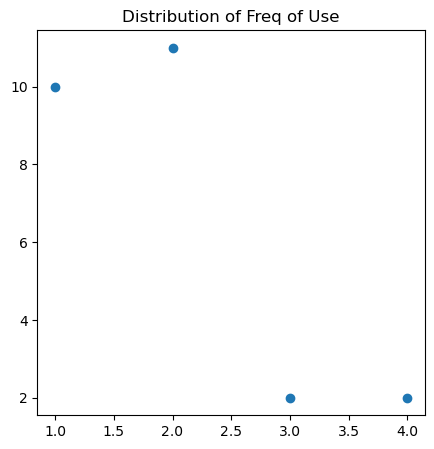

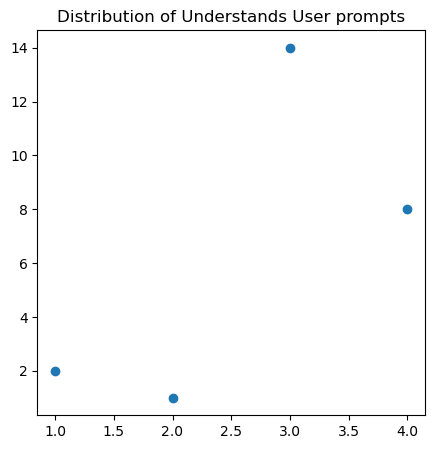

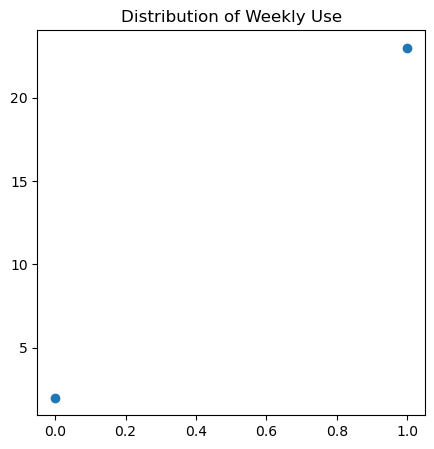

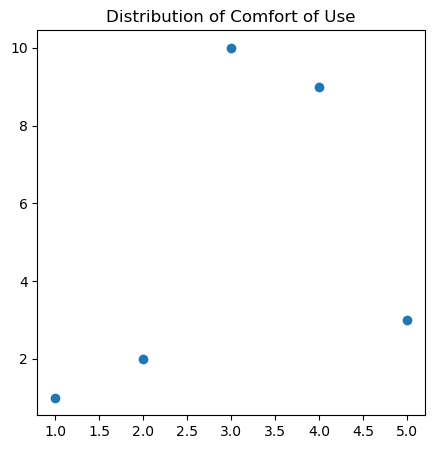

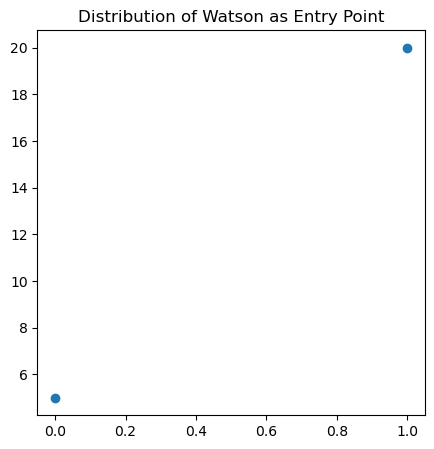

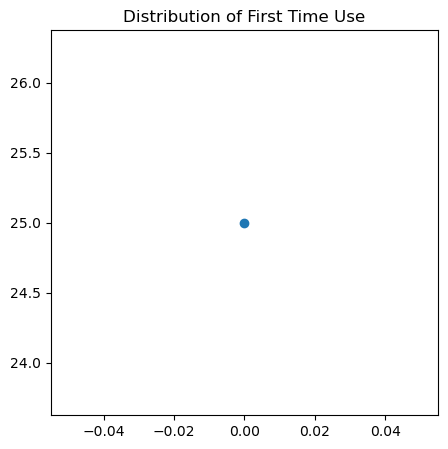

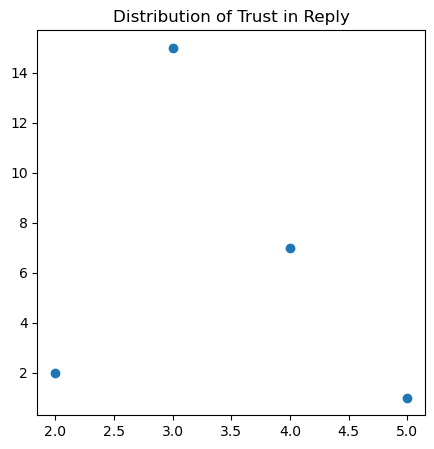

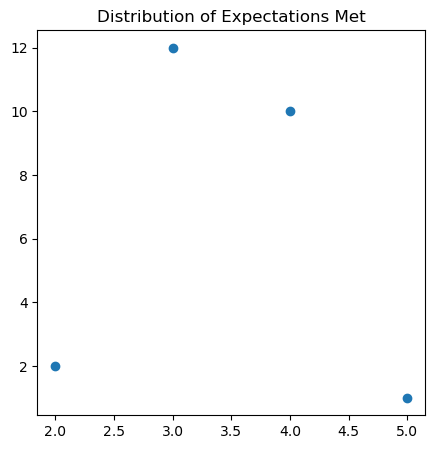

[('Q1', 3),
 ('Q1', 13),
 ('Q2', 5),
 ('Q2', 9),
 ('Q3', 6),
 ('Q3', 13),
 ('Q4', 17),
 ('Q5', 3),
 ('Q5', 6),
 ('Q5', 13),
 ('Q5', 15),
 ('Q5', 19)]

In [5]:
v1 = Scry(df)
v1.index_outliers()

In [6]:
df.iloc[13]

Q1    4
Q2    4
Q3    0
Q4    3
Q5    0
Q6    0
Q7    4
Q8    4
Name: 13, dtype: int64

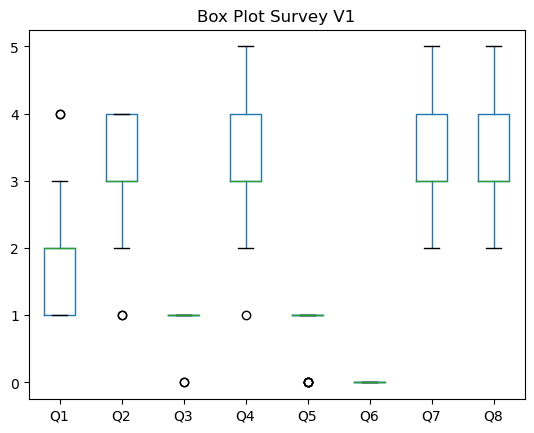

In [7]:
df.boxplot(grid=False)
plt.title('Box Plot Survey V1')
plt.savefig('box_plots_v1.png')
# Show the plot
plt.show()

In [8]:
df.corr()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
Q1,1.000000,0.305317,-0.556258,0.181531,-4.318182e-01,NaN,0.281812,3.674047e-01
Q2,0.305317,1.000000,-0.137350,0.399944,-1.716016e-01,NaN,0.380705,5.519851e-01
Q3,-0.556258,-0.137350,1.000000,-0.018793,5.897678e-01,NaN,-0.319499,-2.553770e-01
Q4,0.181531,0.399944,-0.018793,1.000000,2.124296e-02,NaN,0.442422,6.500255e-01
Q5,-0.431818,-0.171602,0.589768,0.021243,1.000000e+00,NaN,-0.090289,-8.813579e-17
Q6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q7,0.281812,0.380705,-0.319499,0.442422,-9.028939e-02,NaN,1.000000,8.861863e-01
Q8,0.367405,0.551985,-0.255377,0.650025,-8.813579e-17,NaN,0.886186,1.000000e+00


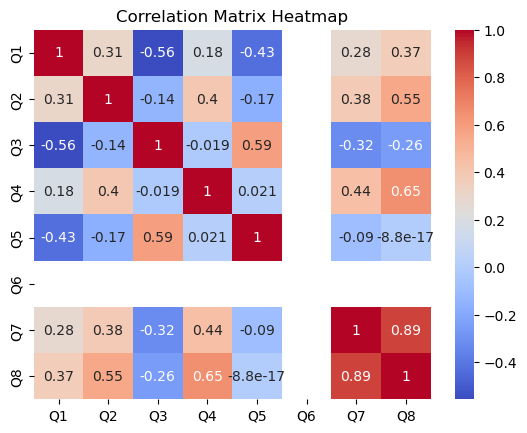

In [9]:
correlation_matrix = df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Set the title
plt.title('Correlation Matrix Heatmap')
plt.savefig('heatMap.png')
# q 6 is all first time use wowowow

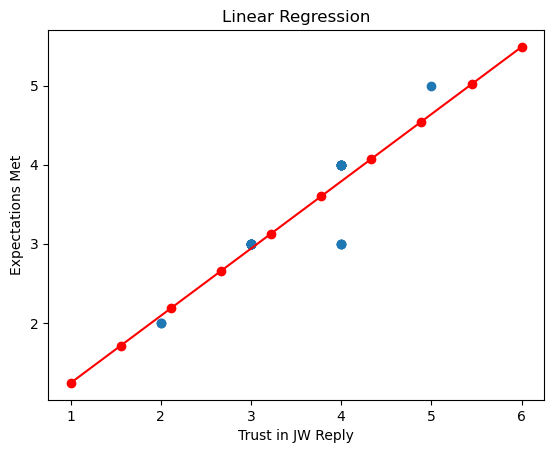

R-squared value: 0.7853260869565217
y_delta: [1.24       1.71222222 2.18444444 2.65666667 3.12888889 3.60111111
 4.07333333 4.54555556 5.01777778 5.49      ]


<Figure size 640x480 with 0 Axes>

In [23]:
def linear_regression(v1, v2, x_label='Trust in JW Reply'):
    x_mu = np.mean(v1)
    y_mu = np.mean(v2)
        
    n = len(v1)
    top_term = sum((v1[i] - x_mu) * (v2[i] - y_mu) for i in range(n))
    btm_term = sum((v1[i] - x_mu)**2 for i in range(n))

    m = top_term / btm_term
    b = y_mu - (m * x_mu)

    max_x = np.max(v1) + 1
    min_x = np.min(v2) - 1
    x_delta = np.linspace(min_x, max_x, 10)

    y_delta = b + m * x_delta
    
    # Calculate R-squared
    y_pred = m * v1 + b
    ss_res = np.sum((v2 - y_pred) ** 2)
    ss_tot = np.sum((v2 - y_mu) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.title('Linear Regression')
    plt.xlabel(x_label)
    plt.ylabel('Expectations Met')
    plt.scatter(v1, v2)
    plt.plot(x_delta, y_delta, 'ro', linestyle='-')
    plt.show()
    plt.savefig('linear_regression.png')

    return y_delta, r_squared  # return R-squared along with y_delta

v1 = df['Q7']
v2 = df['Q8']

y_delta, r_squared = linear_regression(v2, v1)

print(f"R-squared value: {r_squared}")
print(f"y_delta: {y_delta}")


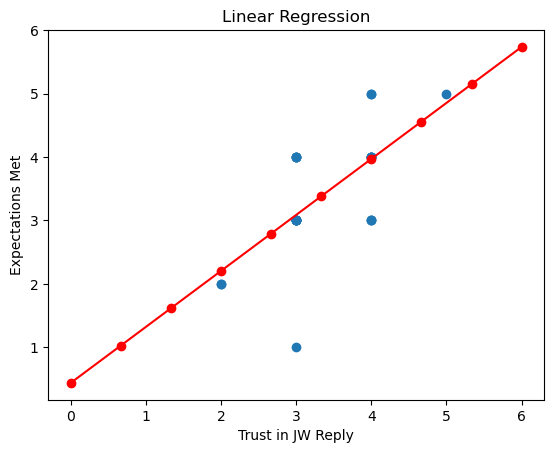

R-squared value: 0.4225330926594465
y_delta: [0.43666667 1.02555556 1.61444444 2.20333333 2.79222222 3.38111111
 3.97       4.55888889 5.14777778 5.73666667]


<Figure size 640x480 with 0 Axes>

In [20]:
v3 = df['Q4']

y_delta, r_squared = linear_regression(v2,v3)

print(f"R-squared value: {r_squared}")
print(f"y_delta: {y_delta}")